# SC2001 Project 1 Integration of Merge Sort & Insertion Sort
## SDAB Group 8

## Members:
- Adele Teng
- Nicholas Chang
- Rachel Tan
- Jun Chao

## Table of Contents
1. [Part (a) Algorithm Implementation](#a)
2. [Part (b) Generate Input Data](#b)
3. [Part (c) Analyse Time Complexity](#c)
4. [Part (d) Compare Hybrid Sort with Merge Sort](#d)

# Import Libraries

In [3]:
import random
import time
import math
# Data Analysis
import numpy as np
import pandas as pd
# Visualisation
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

---

<a id='a'></a>
# Part (a) Algorithm Implementation
## Insertion Sort
<div align='center'>
    <img src='./src/lab1_insertion_sort.png' width=600></img>
</div>

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fnaemazam.medium.com%2Finsertion-sort-algorithm-in-data-structures-with-example-7129003768ba&psig=AOvVaw30MCrCNvPwx0dPES8-aDa7&ust=1726498824041000&source=images&cd=vfe&opi=89978449&ved=0CBcQjhxqFwoTCOi59rqbxYgDFQAAAAAdAAAAABBo)

### Insertion Sort Theory
Insertion sort is a simple sorting algorithm that builds a sorted portion of the array one element at a time by repeatedly taking the next unsorted element and placing it into its correct position within the sorted portion.

### Insertion Sort pseudocode

    FUNCTION insertion_sort(arr, start, end):
        SET comparisons TO 0  // Initialize comparison counter

        FOR i FROM (start + 1) TO end:  // Traverse the array starting from the second element
            FOR j FROM i TO (start + 1) IN REVERSE:  // Traverse backwards from current element i
                INCREMENT comparisons  // Count the comparison

                IF arr[j] < arr[j - 1]:  // If current element is smaller than the previous one
                    SWAP arr[j] AND arr[j - 1]  // Swap the elements
                ELSE:
                    BREAK  // Exit the loop as the correct position is found

        RETURN comparisons  // Return the number of comparisons made

### Time Complexity 
- Best Case: `O(n)`: In the best case, the array is already sorted. The inner loop will break early without making swaps. The time complexity in this case is `O(n)`, where n is the number of elements in the array.

- Worst Case: `O(n²)`: In the worst case, every element needs to be compared and swapped with all the previous elements, resulting in a time complexity of `O(n²)`.

- Average Case: `O(n²)`: In the average case, the time complexity is `O(n²)`, as on average, the elements need to be compared and swapped halfway through the sorted portion.

### Space Complexity
- `O(1)`: The algorithm typically performs in-place sorting, meaning it rearranges the elements within the input array itself without requiring additional data structures or memory allocation proportional to the input size.

In [6]:
def insertion_sort(arr, start, end):
     # Initialize a variable to count the number of comparisons
    comparisons = 0
    
     # Loop through the array from the second element (start + 1) to the end
    for i in range(start + 1, end + 1):
        # Perform a backward comparison from the current element to the start
        for j in range(i, start, -1):
            # Increment the comparison counter
            comparisons += 1
             # If the current element is smaller than the previous one, swap them
            if arr[j] < arr[j-1]:
                arr[j], arr[j-1] = arr[j-1], arr[j]
            else:
                # Stop checking further if the current element is not smaller
                break
            
    # Return the total number of comparisons made
    return comparisons

## Merge Sort
<div align='center'>
    <img src='./src/lab1_merge_sort.png' width=400></img>
</div>

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FMerge_sort&psig=AOvVaw3IhptLJ00K7BKtbAA-5Vjg&ust=1726500102300000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCMjijpygxYgDFQAAAAAdAAAAABBM)

### Merge Sort Theory
Merge sort is a divide-and-conquer algorithm that recursively divides the input array into smaller subarrays, sorts them, and then merges these sorted subarrays to produce a final sorted array.

### Merge Sort Pseudocode
    FUNCTION merge_sort(arr, start, end):
    IF start < end:
        SET mid TO (start + end) // 2
        SET left_comparisons TO merge_sort(arr, start, mid)
        SET right_comparisons TO merge_sort(arr, mid + 1, end)
        SET merge_comparisons TO merge(arr, start, mid, end)
        RETURN left_comparisons + right_comparisons + merge_comparisons
    RETURN 0

    FUNCTION merge(arr, start, mid, end):
        CREATE left array as arr[start:mid + 1]
        CREATE right array as arr[mid + 1:end + 1]
        SET i, j, k TO 0, 0, start
        SET comparisons TO 0

        WHILE i < length of left AND j < length of right:
            INCREMENT comparisons
            IF left[i] <= right[j]:
                SET arr[k] TO left[i]
                INCREMENT i
            ELSE:
                SET arr[k] TO right[j]
                INCREMENT j
            INCREMENT k

        WHILE i < length of left:
            SET arr[k] TO left[i]
            INCREMENT i, k

        WHILE j < length of right:
            SET arr[k] TO right[j]
            INCREMENT j, k

        RETURN comparisons
        
### Time Complexity
- Best Case: `O(n log n)`: Even in the best case scenario (already sorted array), merge sort still divides the array and merges it back, resulting in `O(n log n)` complexity.

- Worst Case: `O(n log n)`: The worst case time complexity is also `O(n log n)`, as merge sort always divides the array into two halves and performs a linear-time merge operation.

- Average Case: `O(n log n)`: The average case is the same as the best and worst cases, `O(n log n)`.

### Space Complexity
- `O(n)`: Merge sort requires additional space proportional to the size of the input array for the merging process. This results in a space complexity of `O(n)`.

In [8]:
def merge(arr, start, mid, end):
    # Create two temporary arrays for the left and right halves
    left = arr[start:mid + 1]
    right = arr[mid + 1:end + 1]
    
    # Initialize pointers for left and right arrays
    i = j = 0
    # Initialize pointer for merged array
    k = start
    
    # Initialize a counter for comparisons
    comparisons = 0

    # Compare and merge elements from left and right arrays
    while i < len(left) and j < len(right):
        # Increment comparison counter
        comparisons += 1
        # Choose the smaller element and place it in the merged array
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1

    # Copy any remaining elements from the left array
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1

    # Copy any remaining elements from the right array
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1

    # Return the number of comparisons made during merging
    return comparisons

def merge_sort(arr, start, end):
    # Base case: if the array has 0 or 1 element, no comparisons needed, return 0
    if start < end:
        # Calculate the middle index
        mid = (start + end) // 2
        
        # Recursively sort the left half
        left_comparisons = merge_sort(arr, start, mid)
        
        # Recursively sort the right half
        right_comparisons = merge_sort(arr, mid + 1, end)
        
        # Merge the sorted halves and count comparisons
        merge_comparisons = merge(arr, start, mid, end)
        
        # Return the total number of comparisons
        return left_comparisons + right_comparisons + merge_comparisons
    
    return 0

## Hybrid Sort
<div align='center'>
    <img src='./src/lab1_hybrid_sort.jpg' width=800></img>
</div>

[Source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fcs.stackexchange.com%2Fquestions%2F68179%2Fcombining-merge-sort-and-insertion-sort&psig=AOvVaw3XkNuscst-MR7Fdpu7HBtm&ust=1726498794703000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCIiMkK2bxYgDFQAAAAAdAAAAABAE)

### Hybrid Sort Theory
- Determine a size S which is the biggest size to use insertion sort
- If array size is S or smaller: use insertion sort all the way 
- If array size is bigger than S, use merge sort to divide sub-arrays recursively. When sub-array is S or smaller, switch to insertion sort. Merge the sorted sub-arrays.

- Combining the advantages of both merge sort and insert sort 
    - From insertion sort: 
        - if size of array is small, insertion sort runs faster than merge sort. 
        - Takes `O(n)` on best case (vs merge sort which has best case of `O(n log n)`)
        - space efficient; No auxillary space needed (as aforementioned)
    - From merge sort:
        - Divide and conquer algorithm; dividing into sub-porblems has no major cost on time complexity, time efficient
        - Preferred for huge data sets, runs faster than insertion sort if size of array is big

### Hybrid sort Pseudo code 

    FUNCTION hybrid_sort(arr, start, end, S):
        WHILE end - start + 1 <= S:
            RETURN insertion_sort(arr, start, end)
        ELSE:
            SET mid TO (start + end) // 2
            SET left_comparisons TO hybrid_sort(arr, start, mid, S)
            SET right_comparisons TO hybrid_sort(arr, mid + 1, end, S)
            SET merge_comparisons TO merge(arr, start, mid, end)
            RETURN left_comparisons + right_comparisons + merge_comparisons
        

### Time Complexity
For insertion sort (when array size bigger than S), n/S subarrays of size S. 
- Best case: (n/S) * S = O(n)
- Worst case: (n/S) * S<sup>2</sup> = O(nS)
- Average case: O(nS)

For merge sort, merging (n/S) groups. 
- Best case: n * log(n/S) = O(n log(n/S))
- Worst case: O(n log(n/S)). No change.
- Average case: O(n log(n/S))


For hybrid sort, combine the cases of insertion sort and merge sort:
- Best case: `O(n)`: Same as the best case of insertion sort; When array is smaller than S, we only do insertion sort.
    - For this project, our range for array sizes is 1,000 to 10 million. As S value is determined to be smaller than all of the array sizes [part (c)], we only consider cases that implement both insert and merge sort in the algorithm for the project. 
- Best case when array size is bigger than S: `O(n + n log(n/S))` 
- Worst case: `(nS + n log(n/S))`
- Average case: `(nS + n log(n/S))`

### Space Complexity
`O(n)`: The space complexity of merge sort (which is bigger than that of insertion sort of O(1) ).


In [ ]:
def hybrid_sort(arr, start, end, S):
    # if size of array is less or equal than S, use insertion sort
    if end - start + 1 <= S: 
        return insertion_sort(arr, start, end) 
    
    else: # if size of array bigger than S, use merger sort
        # get middle index
        mid = (start + end) // 2
        
        # recursively sort the left half, 
        # but check for size of sub-array
        left_comparisons = hybrid_sort(arr, start, mid, S)
        # recursively sort the right half, 
        # but check for size of sub-array
        right_comparisons = hybrid_sort(arr, mid + 1, end, S)
        # merge the sorted halves and count comparisons
        merge_comparisons = merge(arr, start, mid, end)
        
        # return the total number of comparisons
        return left_comparisons + right_comparisons + merge_comparisons

---

<a id='b'></a>
# Part (b) Generate Input Data

gen_data(size, max_value) makes an array of randomly generated data from 1 to max_value, of an indicated size. 

gen_ds() creates a dictionary of sizes as keys to randomly generated data of respective sizes, with its data range being 1 to said size.


In [13]:
def gen_data(size, max_value): #generate random data array
    return [random.randint(1, max_value) for _ in range(size)]

def gen_ds():
    dataset_dict = {}
    #random data array of every size in SIZES
    # range 1 to size of array
    for size in SIZES:  
        dataset_dict[size] = gen_data(size, size)  
    return dataset_dict

In [14]:
# Array input sizes to test
SIZES = [1000, 10000, 100000, 1000000, 10000000]
# Generate data records for each input size
DATASETS = gen_ds()

---

<a id='c'></a>
# Part (c) Analyse Time Complexity
## Approach
### Evaluate Algorithm
- We ran the hybrid sort on each combination of `input array size` and `S value` and obtained the `No. of Comparisons` and `CPU Time`.
- For our input array size options, we increased each element 10 times from 1000 to 10 million.
- Our initial choice of S values to test `[4, 8, 16, 32, 64]`
    - To **follow the logarithmic scale** of the divide and conquer algorithm.
    - Selected this range as values should **not be too small** for **effective usage of merge sort** but **not too large** for **efficient usage of insertion sort**.
    - Obtain a **spread of values** for **efficient testing**.
    - Powers of 2 allows for **faster execution by the computer memory** since they work in binary.

In [17]:
# Initial choice of S values to test
S_values = [4, 8, 16, 32, 64]

In [18]:
# Function to get the no. of comparisons and CPU time
# Inputs: array of varying input sizes, sorting algorithm and S value
def get_metrics(arr, type='hybrid', S=5):
    
    # Copy the array to prevent modifying the original array
    arr_copy = arr.copy()

    # Start timing
    start_time = time.time()

    # Execute selected sorting algorithm on the inputted array and S value
    if type == 'hybrid':
        comparisons = hybrid_sort(arr_copy, 0, len(arr_copy) - 1, S)
    elif type == 'merge':
        comparisons = merge_sort(arr_copy, 0, len(arr_copy) - 1)

    # Stop timing
    end_time = time.time()
    
    # Get time lapse
    time_lapse = end_time - start_time
    
    # Return metrics
    return time_lapse, comparisons

In [19]:
# Generate a dictionary for evaluation metrics
def eval_sort(S_values, ds_dict):
    # Initialise dictionary to store metrics
    results_dict = {}
    
    # For each input size, initiailise an array to store arrays of metrics
    for size, data in ds_dict.items():
        print(f"Evaluating array size: {size}")
        metrics_byS = []

        # Set seed value for the random generation of numbers to ensure consistent results
        random.seed(1)
    
        # For each s value, get the metrics and add it to the metrics_byS array
        for S in S_values:
            cpu_time, comparisons = get_metrics(data, type='hybrid', S=S)
            metrics_byS.append([S, cpu_time, comparisons])
        
        # Add a new metric record into the dictionary
        results_dict[size] = metrics_byS
    
    # Return dictionary
    return results_dict

In [20]:
# Convert dictionary to dataframe for visualisation purposes
def dict2df(dict2convert):
    # Initialise array
    rows = []
    for key, value_list in dict2convert.items():
        for sublist in value_list:
            rows.append([key] + sublist)
    
    # Create the DataFrame
    return pd.DataFrame(rows, columns=['Array Size', 'S', 'Time', 'Comparisons'])

In [21]:
# Get metrics for varying input sizes and S values
results_dict = eval_sort(S_values, DATASETS)

Evaluating array size: 1000
Evaluating array size: 10000
Evaluating array size: 100000
Evaluating array size: 1000000
Evaluating array size: 10000000


In [22]:
# Output Metrics Dataframe
results_df = dict2df(results_dict)
results_df

,Array Size,S,Time,Comparisons
0,1000,4,0.002194,8778
1,1000,8,0.002039,9162
2,1000,16,0.001499,10442
3,1000,32,0.001329,13568
4,1000,64,0.002085,20553
5,10000,4,0.021043,120612
6,10000,8,0.014911,121648
7,10000,16,0.014277,127213
8,10000,32,0.015319,143403
9,10000,64,0.018066,182772


### Plot Graphs
1. Compared `number of key comparisons` over `input array size`.
    - Selected **S = 16** as it was the mid point of our values.
    - Theoretically, the graph should follow the formula with different values of sizes: $$ y = nS + n \log\left(\frac{n}{S}\right) $$
2. Compared `number of key comparisons` over `S values`.
    - Selected **input size = 10000** from our values.
    - Theoretically, the graph should follow the formula with different values of S: $$ y = nS + n \log\left(\frac{n}{S}\right) $$
4. Compared `CPU Time` over `S values`.
    - **Narrowed down** the range of `S values` to test.
5. Compared `CPU Time` over the narrowed `S values`. 
    - To obtain **more accurate results** on the optimal `S value`.
---

In [24]:
def plot_comparison_over_size(actual_df, theoretical_df, S_selected):
    plt.figure(figsize=(12, 8))

    # Plots
    plt.plot(theoretical_df['Array Size'], theoretical_df['Comparisons'], '-o', label='Theoretical')
    plt.plot(actual_df['Array Size'], actual_df['Comparisons'], '-o', label='Empirical')

    # Labels and Title
    plt.xlabel('Input Array Size', size=16, fontweight='bold')
    plt.ylabel('Key Comparisons', size=16, fontweight='bold')
    plt.title(f'Hybrid Sort Performance Key Comparisons over Input List Sizes (S={S_selected})', size=20, fontweight='bold')
    plt.legend()

    # Layout
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.show()

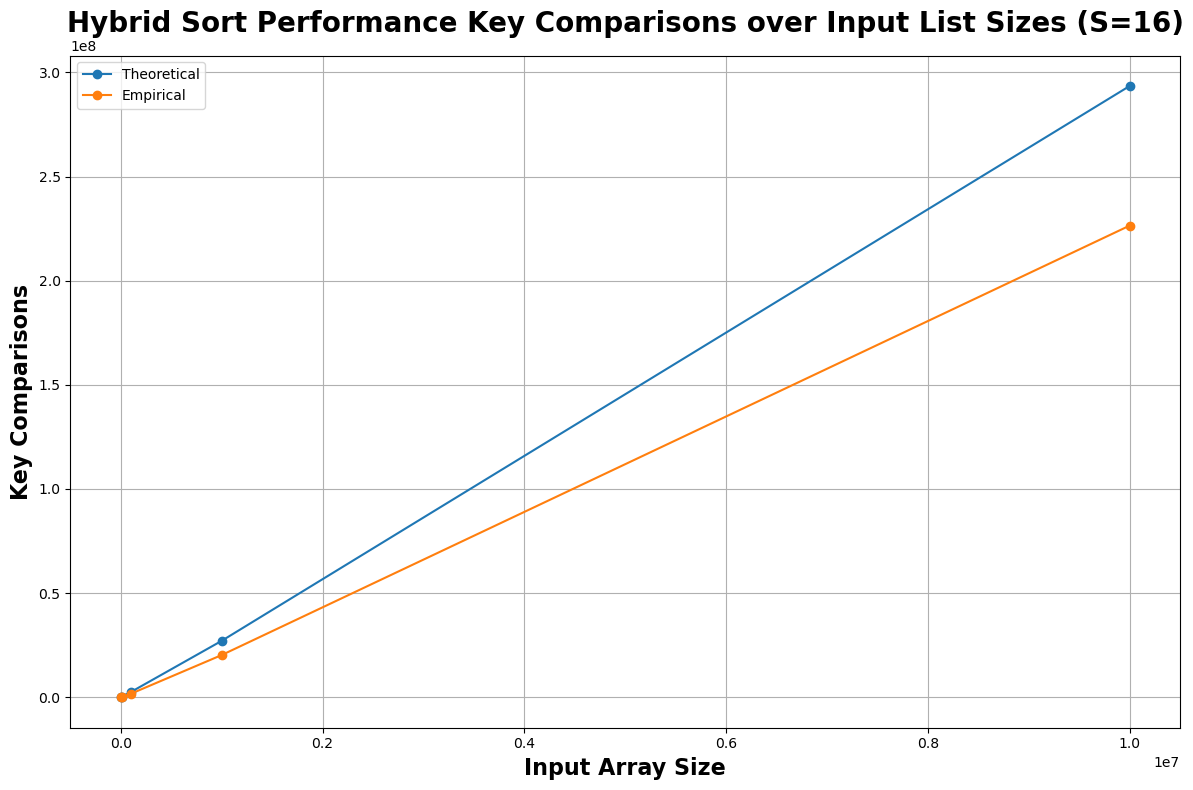

In [25]:
# Get mid point of S values
S_mid = len(S_values)//2
S_chosen = S_values[S_mid]
filtered_df = results_df[results_df['S'] == S_chosen]

# Get theoretical results
theoretical = [(size * S_chosen) + size * (np.log(size/S_chosen)) for size in SIZES]
theoretical_df = pd.DataFrame({'Array Size': SIZES, 'Comparisons': theoretical})

plot_comparison_over_size(filtered_df, theoretical_df, S_values[S_mid])

**Analysis of Hybrid Sort Performance with Key Comparisons over Input List Sizes**
- As input array size increases, the general trend is an increase in the number of comparisons.
- The empirical results follows a **similar trend** as reflected by the theoretical results.
- No. of key comparisons is **generally lower** for various empiricial than theoretical results as input array size increases.
    - In practice, we may encounter more best and average cases.

---

In [27]:
def plot_comparison_over_S(actual_df, theoretical_df, size_selected, setxticks=False):
    plt.figure(figsize=(12, 8))

    # Plots
    plt.plot(theoretical_df['S'], theoretical_df['Comparisons'], '-o', label='Theortical')
    plt.plot(actual_df['S'], actual_df['Comparisons'], '-o', label='Empirical')

    # Labels and Title
    plt.xlabel('S Values', size=16, fontweight='bold')
    # Set custom xticks if range is wide enough
    if setxticks:
        plt.xticks(list(range(1, 21)))
    plt.ylabel('Key Comparisons', size=16, fontweight='bold')
    plt.title('Hybrid Sort Performance Key Comparisons over S values (Array Size = 10000)', size=18, fontweight='bold')
    plt.legend()

    # Layout
    plt.grid(True)
    plt.tight_layout()
    plt.show()

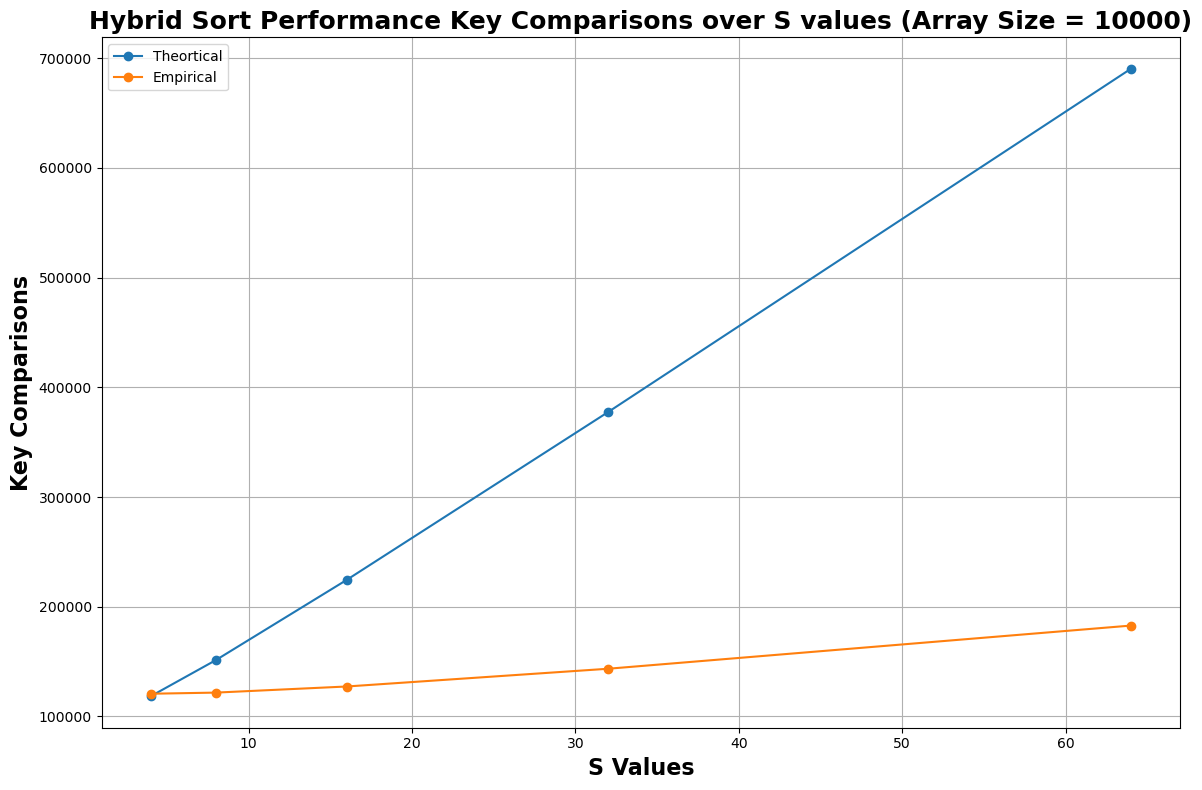

In [28]:
size_chosen = 10000
filtered_df = results_df[results_df['Array Size'] == size_chosen]

theoretical_s = [(size_chosen * S) + size_chosen * (np.log(size_chosen/S)) for S in S_values]
theoretical_s_df = pd.DataFrame({'S': S_values, 'Comparisons': theoretical_s})

plot_comparison_over_S(filtered_df, theoretical_s_df, size_chosen)

**Analysis of Hybrid Sort Performance Key Comparisons over S values**
- As S increases, the general trend is an increase in the number of comparisons.
    - For larger S, insertion sort is used to sort larger sub-arrays.
    - Generally, insertion sort has a higher number of comparisons for the same number of elements than merge sort.
    - These reasons likely contributes to the high comparison count.
- No. of key comparisons is **much lower** for various empiricial than theoretical results as input array size increases.
    - In practice, we may encounter more best and average cases.
- Empirical plot **does not seem to follow a similar trend** as the theoretical results, especially at the start where the number of key comparisons is greater for empirical than theoretical.
    - To get a more detailed analysis of the trend for empirical results by plotting the values from range 1 to 64, in intervals of 1.

---

In [30]:
filtered_size_df = {k:v for (k,v) in DATASETS.items() if size_chosen == k}
filtered_results = eval_sort(range(1, 65), filtered_size_df)
filtered_results_df = dict2df(filtered_results)
filtered_results_df

Evaluating array size: 10000


,Array Size,S,Time,Comparisons
0,10000,1,0.026119,120515
1,10000,2,0.021293,120515
2,10000,3,0.018866,120558
3,10000,4,0.018210,120612
4,10000,5,0.016831,121648
...,...,...,...,...
59,10000,60,0.018122,182772
60,10000,61,0.018189,182772
61,10000,62,0.018354,182772
62,10000,63,0.018463,182772


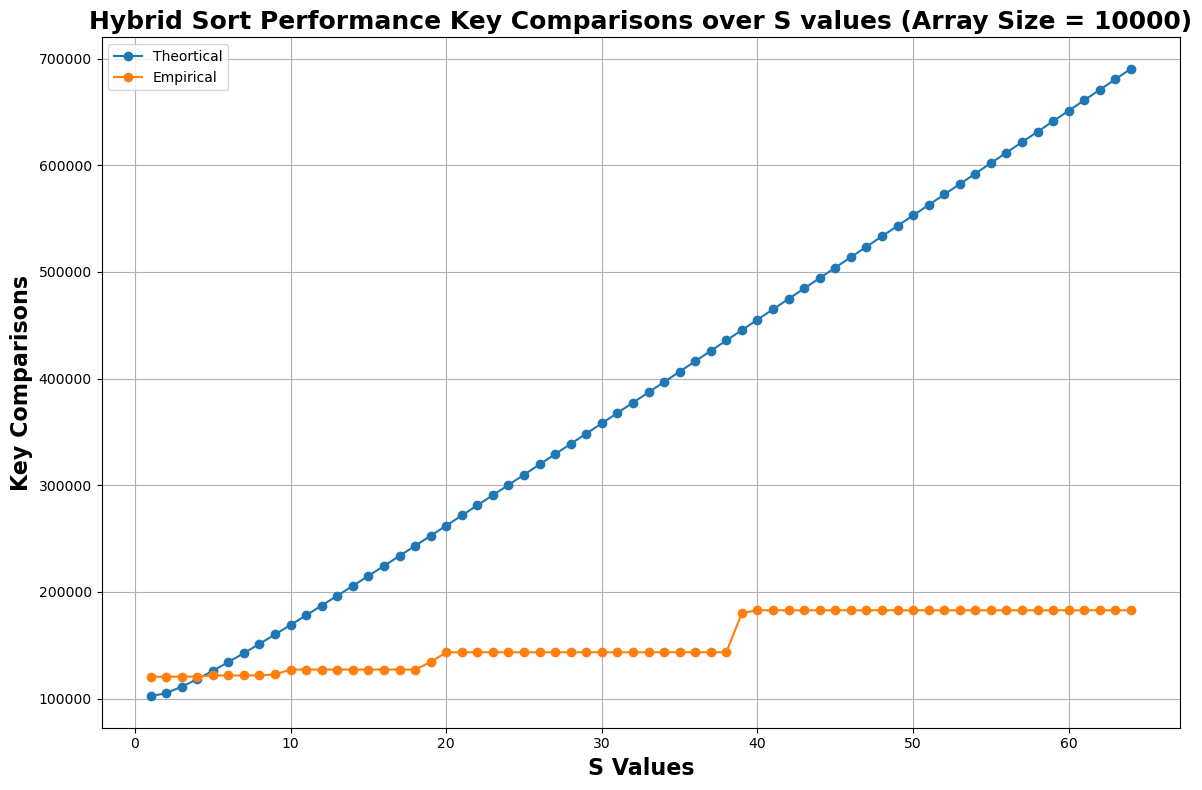

In [31]:
theoretical_all_s = [(size_chosen * S) + size_chosen * (np.log(size_chosen/S)) for S in list(range(1, 65))]
theoretical_all_s_df = pd.DataFrame({'S': list(range(1, 65)), 'Comparisons': theoretical_all_s})

plot_comparison_over_S(filtered_results_df, theoretical_all_s_df, size_chosen)

**Analysis of Hybrid Sort Performance Key Comparisons over S values**
- Observed a different trend between empirical and theortical results as the empirical plot **increases sharply as certain values** and reflects a plateau after the increase.
- The range of the plateau increases as the S values increases.
    - Likely due to the divide-and-conquer nature of the algorithm.
- Plateau: small changes in S within these ranges don't significantly affect the number of comparisons.

---

In [33]:
def plot_cpu_over_s(df, size_selected, numplots=1, setxticks=False):
    if numplots == 1:
        plt.figure(figsize=(12, 8))

        # Plots
        plt.plot(df['S'], df['Time'], '-o')
    
        # Labels and Title
        plt.xlabel('S Values', size=16, fontweight='bold')
        plt.ylabel('CPU Time', size=16, fontweight='bold')
        plt.title('Hybrid Sort Performance CPU Time over S values (Array Size = 10000)', size=18, fontweight='bold')
    else:
        rows = int(math.ceil(numplots/2))
        fig, axes = plt.subplots(rows, 2, figsize=(4*rows, 12))

        for ax, size in zip(axes.flatten(), SIZES):
            size_df = df[df['Array Size'] == size]

            # Plots
            ax.plot(size_df['S'], size_df['Time'], '-o')

            # Labels and Title
            ax.set_xlabel('S Values', size=12)
            if setxticks:
                ax.set_xticks(list(range(10, 21)))
            ax.set_ylabel('CPU Time', size=12)
            ax.set_title(f'Array Size={size}', size=12, fontweight='bold')
        fig.suptitle('Hybrid Sort Performance CPU Time over S values', size=18, fontweight='bold')

    # Layout
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.show()

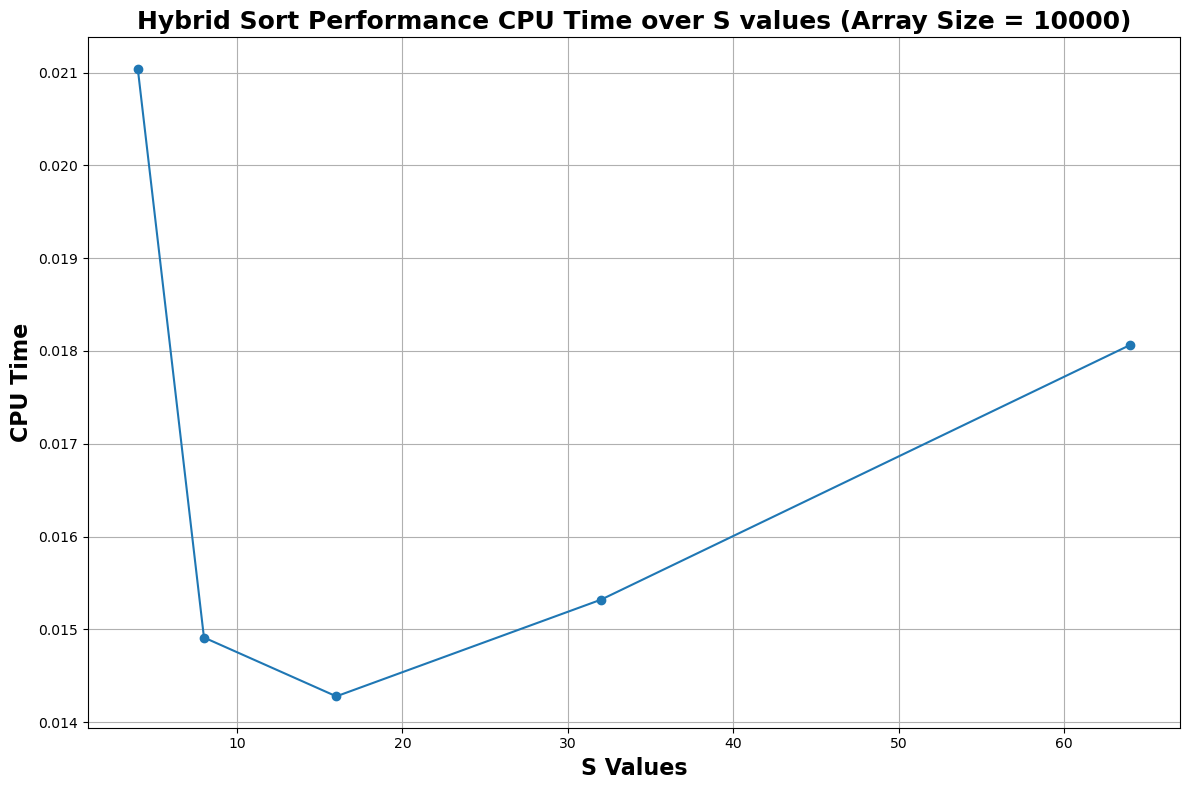

In [34]:
plot_cpu_over_s(filtered_df, size_chosen)

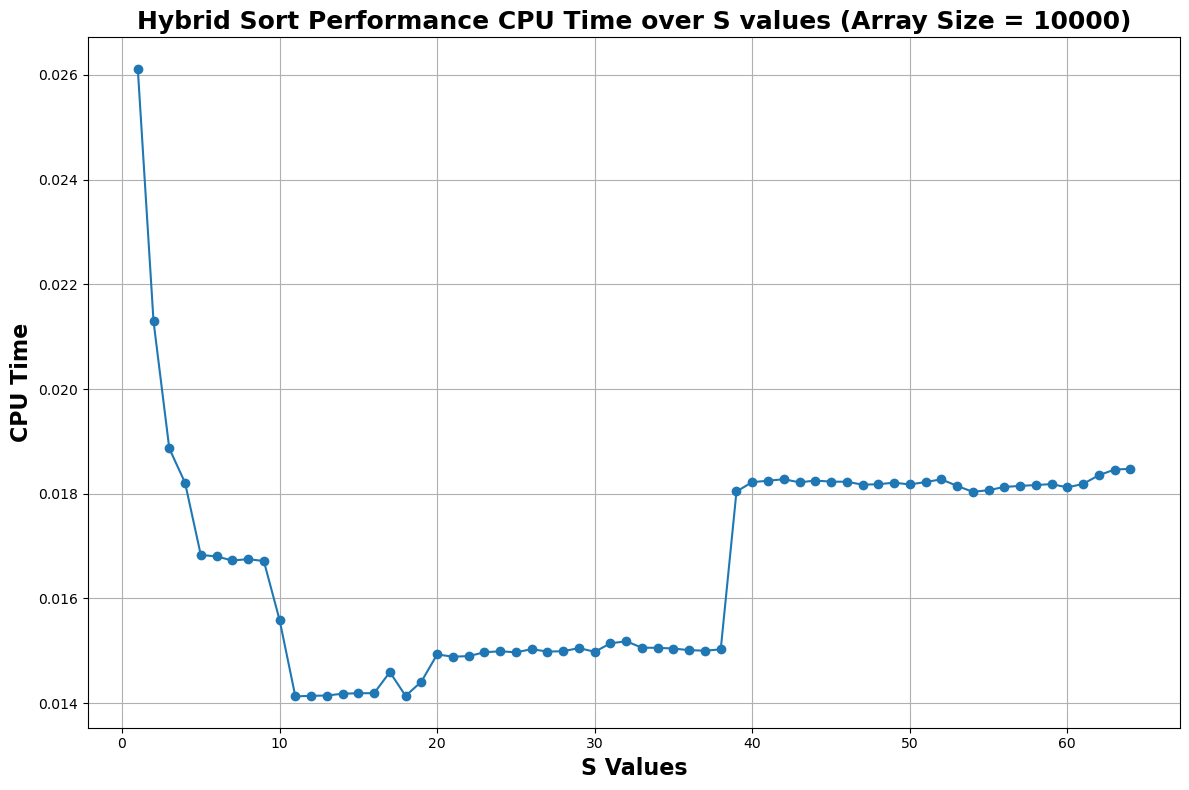

In [35]:
plot_cpu_over_s(filtered_results_df, size_chosen)

**Analysis of Hybrid Sort Performance CPU Time over S values**
- To evaluate the algorithm's efficiency, we will **focus on time efficiency**.
- We define the **optimal S** as the S value with the **shortest CPU time**.
- Based on the comparison of CPU Time over S values plot above, CPU time dips and reaches the shortest timings **between 10 and 20**. Hence, we reran our experiment on these values to obtain a more accurate optimal S.

---

In [37]:
updated_S_values = list(range(10, 21))

In [38]:
narrowed_results_dict = eval_sort(updated_S_values, DATASETS)

Evaluating array size: 1000
Evaluating array size: 10000
Evaluating array size: 100000
Evaluating array size: 1000000
Evaluating array size: 10000000


In [39]:
narrowed_results_df = dict2df(narrowed_results_dict)
narrowed_results_df.head()

,Array Size,S,Time,Comparisons
0,1000,10,0.001055,9162
1,1000,11,0.001202,9162
2,1000,12,0.001316,9162
3,1000,13,0.001115,9162
4,1000,14,0.001112,9162


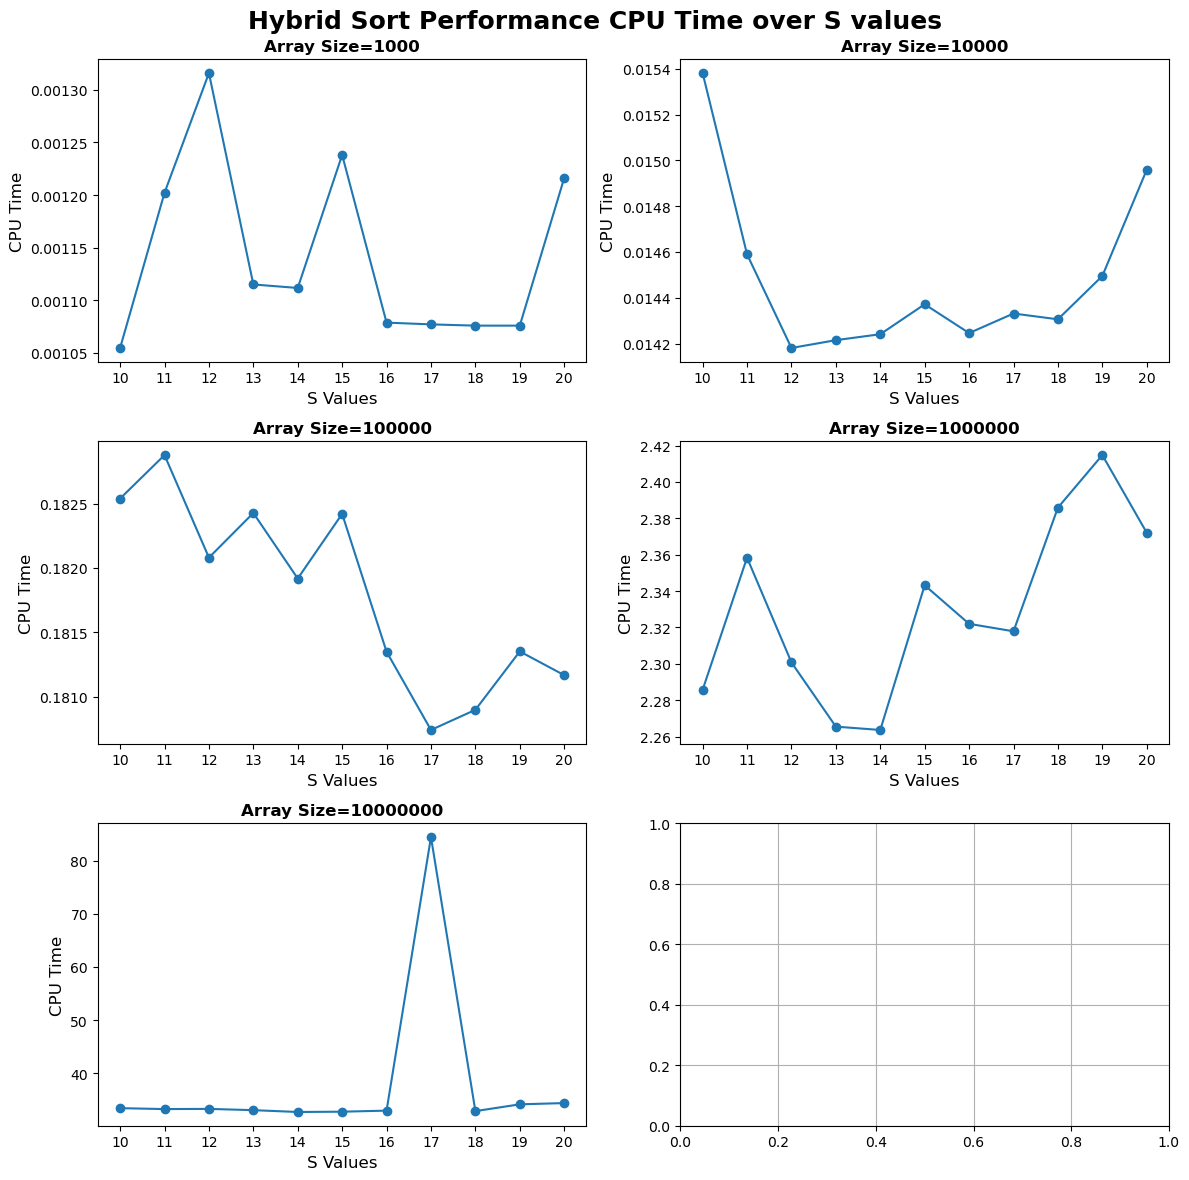

In [40]:
plot_cpu_over_s(narrowed_results_df, size_chosen, numplots=len(SIZES), setxticks=True)

In [41]:
def get_optimal_S(df):
    # Initialise S value to 0
    optimal_S = 0

    # For each array input size get the minimum S value
    for size in SIZES:
        size_df = df[df['Array Size'] == size]
        min_time = size_df['Time'].min()
        record = size_df[size_df['Time'] == min_time]
        optimal_S += int(record['S'])

    # Get average optimal S value
    return math.ceil(optimal_S/len(SIZES))

In [42]:
optimal_S = get_optimal_S(narrowed_results_df)
print(f'Optimal S: {optimal_S}')

Optimal S: 14


**Analysis of Hybrid Sort Performance CPU Time over S values**
- We plotted the CPU time over S value for the 5 different array sizes to obtain an average result.
- We obtained the optimal S value by getting the average minimum value from all sizes to factor various array usages.

---

<a id='d'></a>
# Part (d) Compare Hybrid Sort with Merge Sort

In [45]:
def compare_hybrid_and_merge_sort(arr, optimal_S):
    # Hybrid Sort
    hybrid_time, hybrid_comparisons = get_metrics(arr, 'hybrid', optimal_S)

    # Original merge_sort
    merge_time, merges_comparisons = get_metrics(arr, 'merge')

    return {
        'hybrid': {'time': hybrid_time, 'comparisons': hybrid_comparisons},
        'merge': {'time': merge_time, 'comparisons': merges_comparisons}
    }

In [46]:
# Compare with original merge_sort
print("\nComparing hybrid sort with original merge_sort for 10 million integers...")
comparison_results = compare_hybrid_and_merge_sort(DATASETS[10000000], optimal_S)

print(f"\nResults for 10 million integers with (S={optimal_S}):")
print("Hybrid Sort")
print(f"  Time: {comparison_results['hybrid']['time']:.4f} seconds")
print(f"  Comparisons: {comparison_results['hybrid']['comparisons']}")
print("Merge Sort:")
print(f"  Time: {comparison_results['merge']['time']:.4f} seconds")
print(f"  Comparisons: {comparison_results['merge']['comparisons']}")


Comparing hybrid sort with original merge_sort for 10 million integers...

Results for 10 million integers with (S=14):
Hybrid Sort
  Time: 33.8768 seconds
  Comparisons: 226419772
Merge Sort:
  Time: 36.2283 seconds
  Comparisons: 220104274


# Conclusion

Comparing the performance of the hybrid algorithm and the original Mergesort with optiaml S value of 14 while using these two key metrics: CPU time and number of key comparisons.

**Results**:

Hybrid Sort:
Time: 33.8768 seconds
Comparisons: 226,419,772

Original Mergesort:
Time: 36.2283 seconds
Comparisons: 220,104,274

**Performance Analysis**:
1. Time Efficiency

Hybrid algorithm is faster than original Mergesort (Hybrid Sort took 33.8768 secs while original Mergesort took 36.2283 secs)
Switching to Insertion Sort for smaller subarrays, the overhead from excessive recursive calls is reduced, improving the overall execution time of the hybrid algorithm.

2. Number of Comparisons

The original Mergesort made fewer comparisons than the hybrid algorithm.
The hybrid algorithm still outperformed the original in terms of time. 
Insertion Sort's advantage comes from reduced recursion overhead and better handling of smaller subarrays in terms of CPU time.

**Conclusion**:
The hybrid algorithm is more time-efficient for large datasets (such as 10 million integers), even though it results in a slightly higher number of key comparisons. The reduction in recursion and the efficient sorting of small subarrays via Insertion Sort offsets the increased comparison cost.
Hence, the hybrid algorithm strikes a good balance between time and comparison efficiency, making it a better choice for real-world use on large datasets compared to the original Mergesort.